This Jupyter notebook will focus on creating pie charts, box plots, scatter plots and bubble charts

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df_can.set_index('Country',inplace=True)
df_can.index.name = None
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [5]:
years =  list(map(str,range(1980,2014)))


PIE CHARTS  
A pie chart is a circular graphic that displays numeric proportions by dividing a circle into proportional slices.

In [6]:
# Lets use a pie chart to explore proportion of new immigrants grouped by continents for all years
# We will have to use pandas groupby function. The three main steps group by function involves is 
# Splittig the data into groups based on certain conditions
# Then applying function to each group independently
# Then combining the result into data structure
df_continents = df_can.groupby('Continent', axis= 0).sum()
df_continents.head()

C:\Users\16474\AppData\Local\Temp\ipykernel_15024\2632883935.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df_can.groupby('Continent', axis= 0).sum()


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


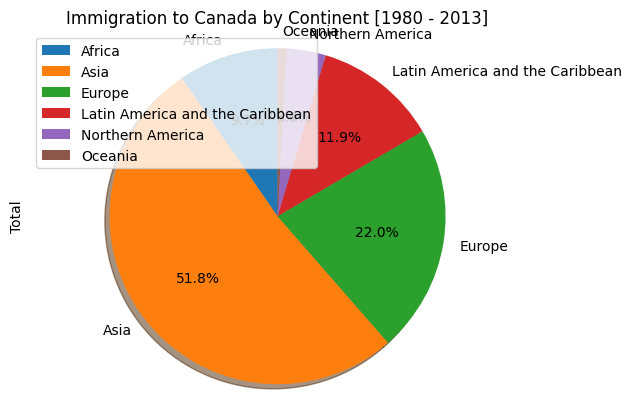

In [7]:
# Now to plot the pie chart pass pie word to kind parameter and also these parameters
# autopct: is a string or function used to label wedges with their numeric value
# startangle: rotates the pie chart by angle degrees 
# shadow: Draws a shadow beneath the pie

df_continents['Total'].plot(kind='pie',
                   autopct='%1.1f%%',
                  startangle= 90,
                  shadow=True)

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_continents.index, loc='upper left') 


plt.show()

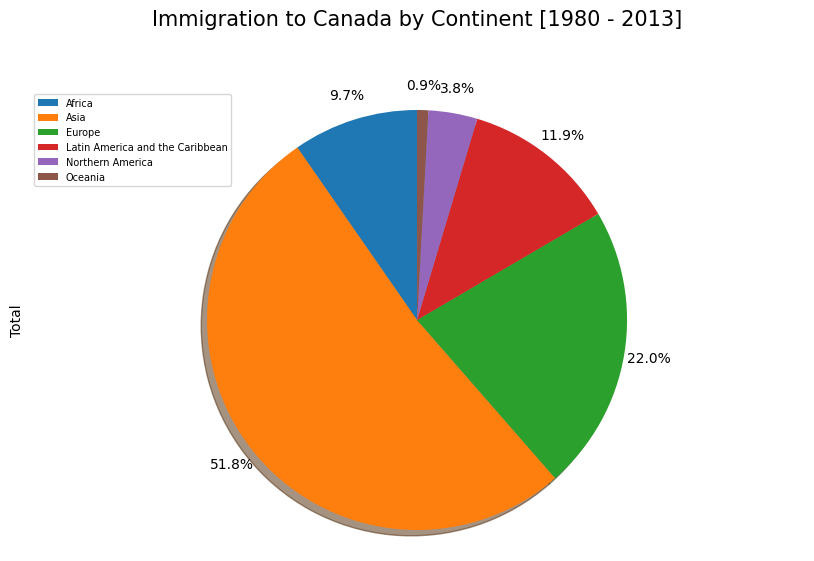

In [8]:
# The above visual we see is not very clear, so lets make few modifications
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            #colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left', fontsize=7) 

plt.show()


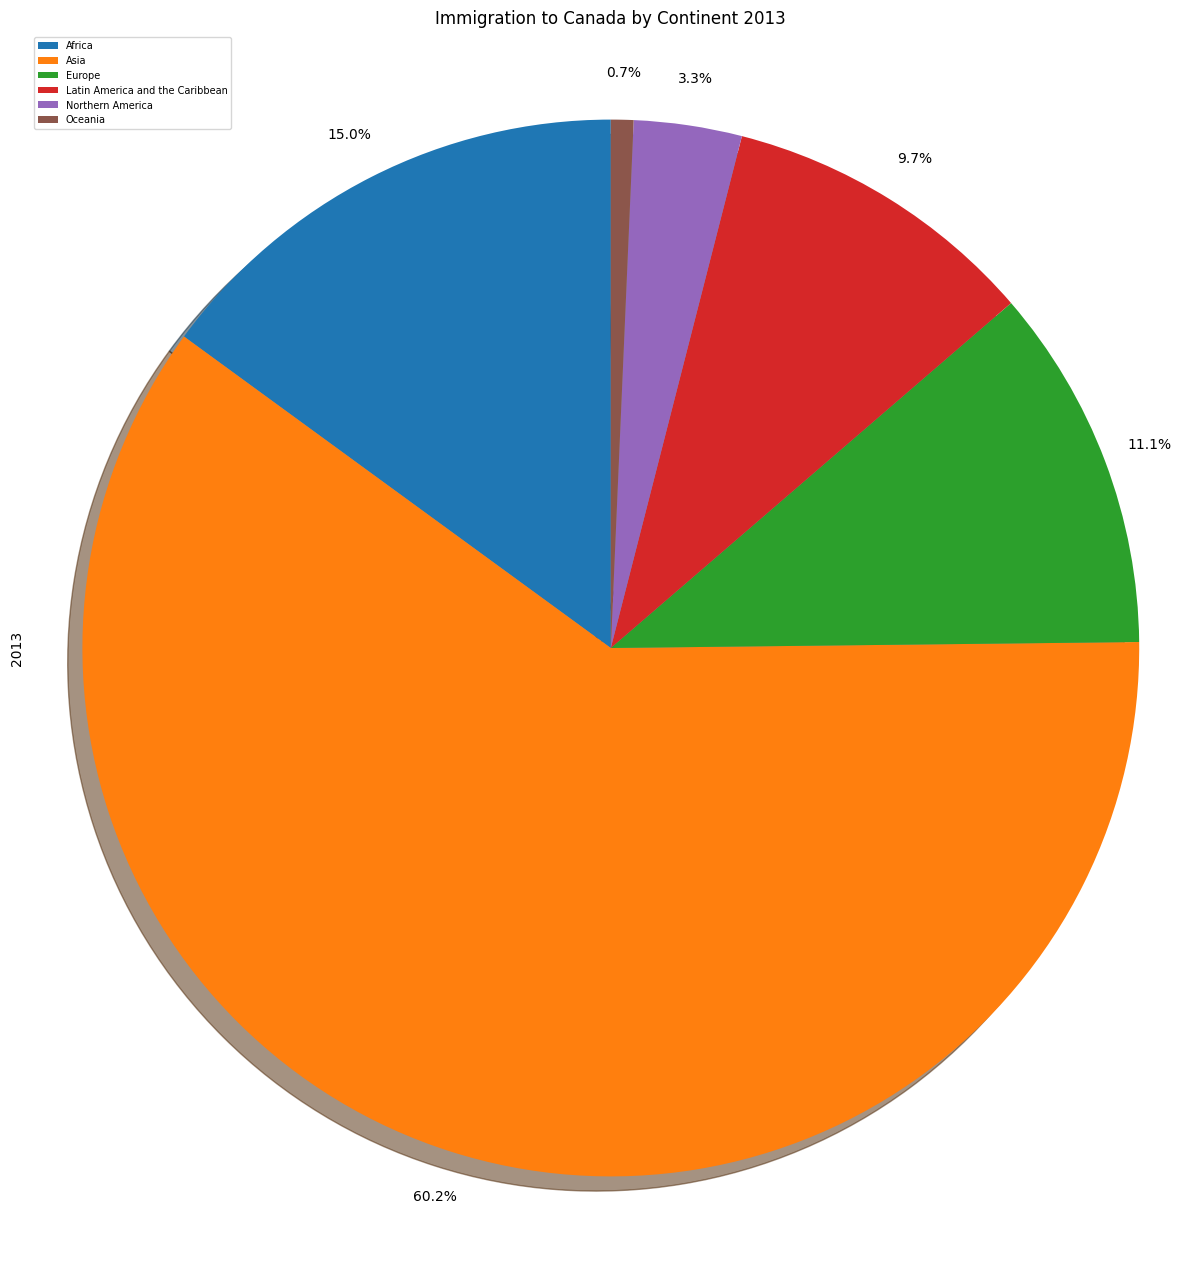

In [9]:
# QUESTION : Using a pie chart explore the proportion of new immigrants grouped by continents in year 2013
df_continents['2013'].plot(kind = 'pie',
                          autopct='%1.1f%%',
                          shadow = True,
                          pctdistance=1.09,
                          labels = None,
                          startangle=90,
                          figsize=(15,16))
plt.title('Immigration to Canada by Continent 2013')
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left', fontsize=7) 


BOX PLOTS  
A box plot is statistical way of representing the data distribution through five main dimensions:  
1. Minimum: The smallest number in dataset excluding the outliers
2. First Quartile: Middle number between minimum and median
3. Second Quartile(Median): Middle number of the stored dataset
4. Third Quartile: Middle number between median and maximum
5. Maximum: The maximum number in dataset excluding outliers

In [10]:
# Generate box plot of Japanese immigration between 1980 and 2013
df_japan = df_can.loc[['Japan'],years].transpose()

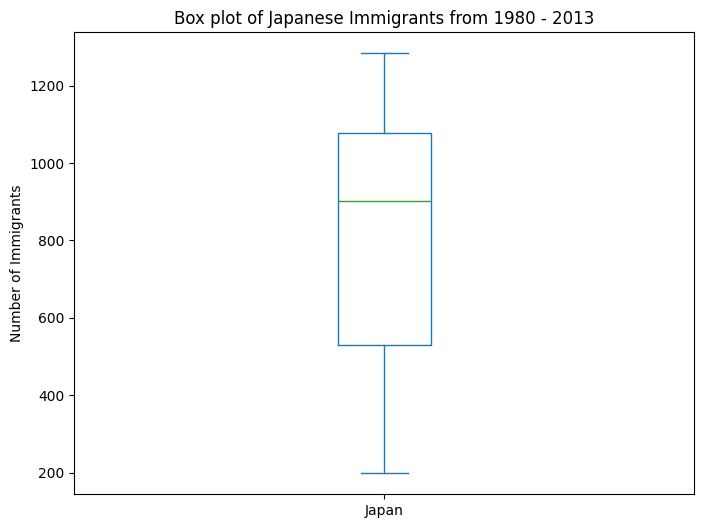

In [11]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [12]:
# We can view actual numbers by calling method descibe
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [13]:
# One of the key benifits of box plots is comparing distribution of multiple datasets. Lets analyse China and India using box plots
df_CI = df_can.loc[['India','China'], years].transpose()

Text(0, 0.5, 'Number of Immigrants')

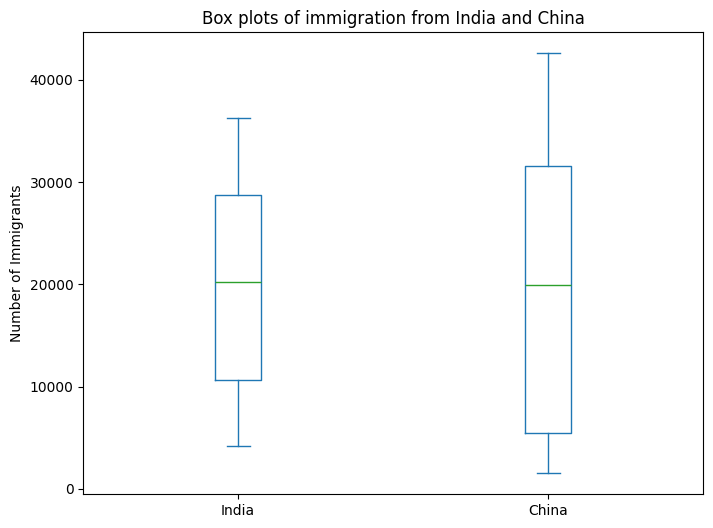

In [14]:
df_CI.plot(kind ='box', figsize=(8,6))
plt.title('Box plots of immigration from India and China')
plt.ylabel('Number of Immigrants')


In [15]:
df_CI.describe()

,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


SUBPLOTS: Often times we want to plot multiple plots within same figure. For example we might want to perform side by side comparison of box plot of China and India's immigration.  
To visualize multiple plots together we can create a FIGURE and divide it into SUBPLOTS, each containing a plot.  
With subplots we usually work with artist layer instead of scripting layer.  
Typical syntax is :  
fig = plt.figure()  -- Create figure  
ax = figure.add_subplot(n_rows, n_columns, plot_number)-- Create subplot

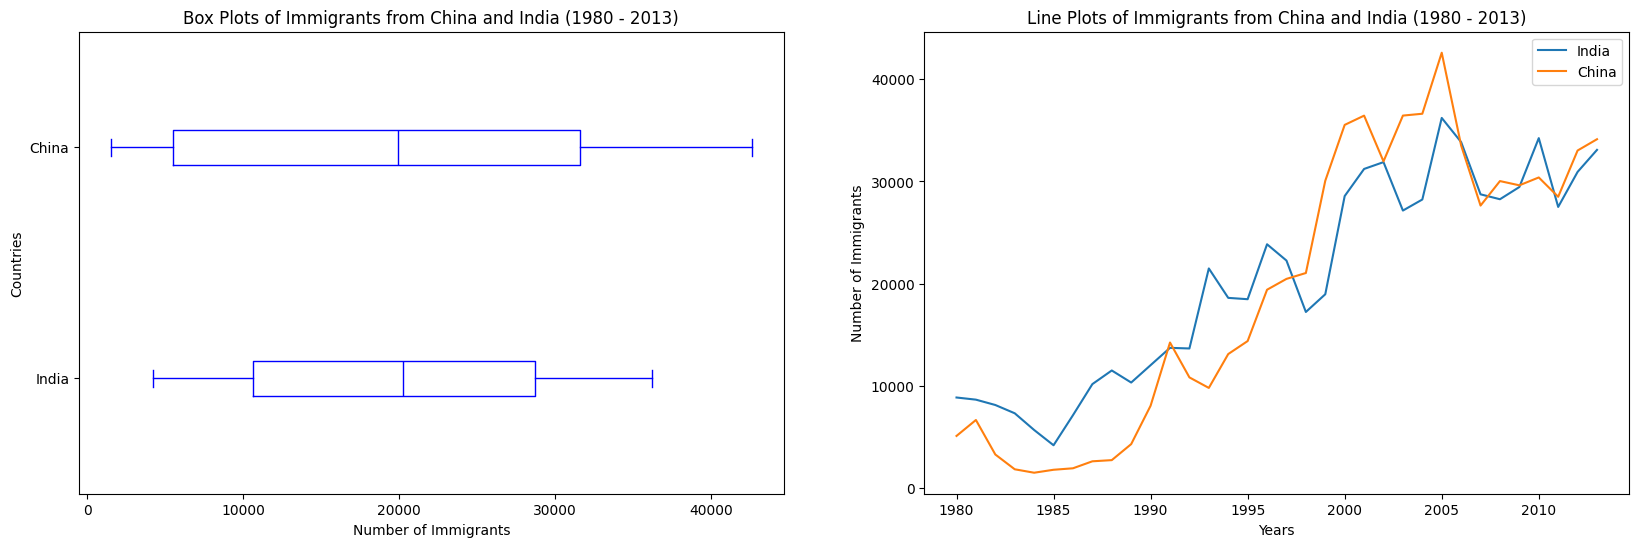

In [16]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Subplot 1: Boxplot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [17]:
# QUESTION: Create a box plot to visualize distribution of top 15 countries grouped by decades 1980s, 1990s and 2000s

df_top15 = df_can.sort_values(['Total'], ascending=False, axis= 0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,...,1405,1263,1235,1267,1013,795,720,779,852,139241


In [18]:
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 
# Then slice the original dataframe to create series of each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)
#merge these series into a new dataframe
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 
new_df.head()


,1980s,1990s,2000s
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


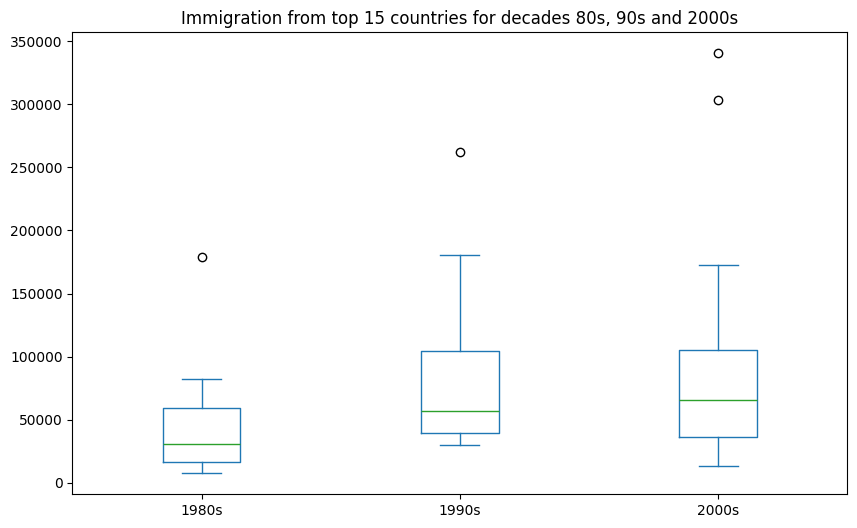

In [19]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

In [20]:
# Lets check how many entries fall above the outlier threshold
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,index,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


SCATTERPLOTS: Is a usefull method to compare variables against each other. The data in scatterplot is considered to express a trend.

In [21]:
# Lets visualize trend of total immigration to Canada(all countries combined) from 1980 to 2013
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


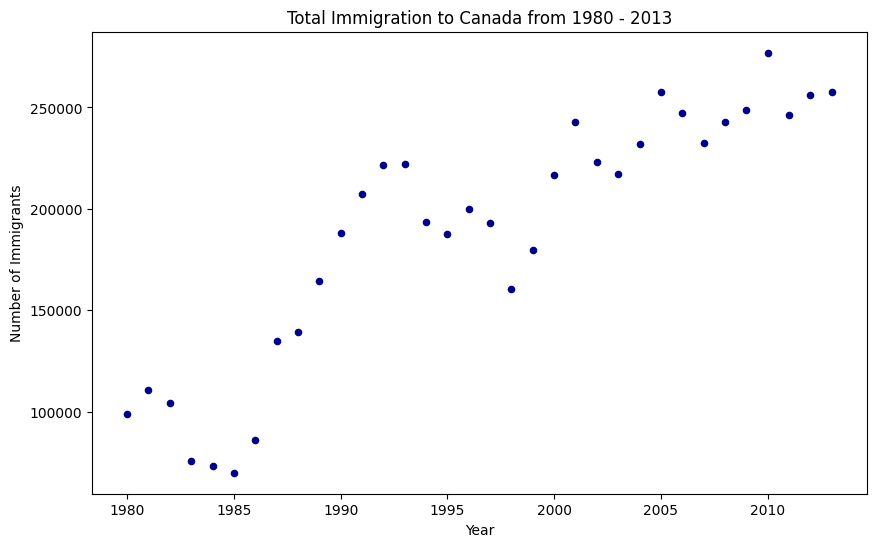

In [22]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [23]:
# Lets try to plot linear line of best fit, and use it to predict number of immigrants in 2015
# STEP 1 : Get the equation of line of best fit. We will use the numpy's polyfit method.
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

In [24]:
# In the above cell output is an array with polynomial coefficients, higher powers first.
# Since we are plotting linear regression y = a*x + b , our output has 2 elements with slope in position 0 and intercept in position 1

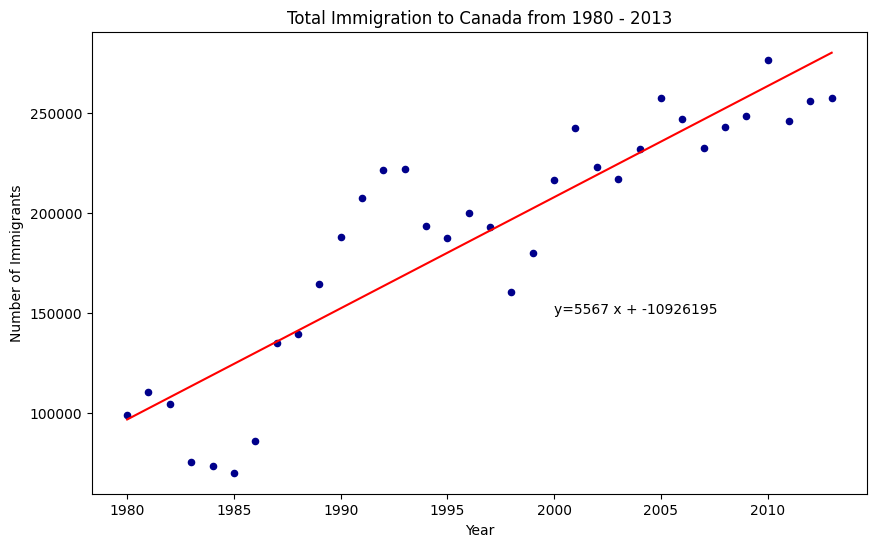

'No. Immigrants = 5567 * Year + -10926195'

In [25]:
# STEP 2 : PLot the regression line on scatter plot
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [26]:
# QUESTION :
# Create a scatterplot of total immigration from Denmark, Norway, Sweden to Canada from 1980 to 2013

# STEP 1: Get the data
df_countries = df_can.loc[['Denmark','Norway','Sweden'], years].transpose()
df_countries.head()

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [27]:
# Step 2 : Sum the immigration numbers across all three countries and turn result into dataframe
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()


,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


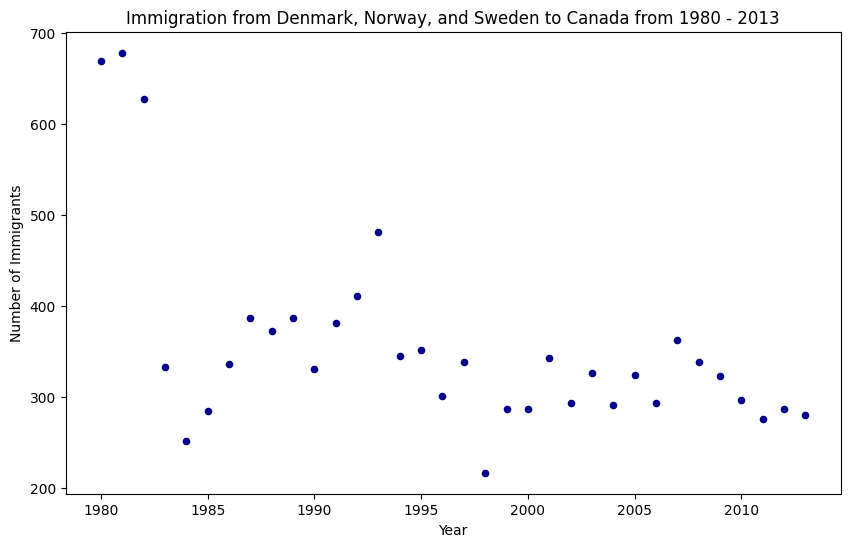

In [28]:
# Step 2 Generate the scatter plot by plotting the total versus year in df_total
    
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

    # add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

    # show plot
plt.show()


Bubble plots  
Is a variation of scatter plots that displays three dimensions of data(x,y,z). The data points are replaced by bubbles and the size of bubble is determined by third variable z, also known as weight.  
In matplotlib we can pass a array or scaler to parameter s to plot(), that contains weight of each point.

In [29]:
# Lets start by analyzing effect of Argentina's great depression, from 1998 to 2002 
# Lets do that by using bubble plot of immigration from brazil and argentina from years 1980 to 2013
# We will set weights of bubbles as the normalized values of population of year each

# STEP 1: Get data for Brazil and Argentina
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [31]:
# STEP 2 Create normalized weights using feature scaling
# Normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())
# Normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

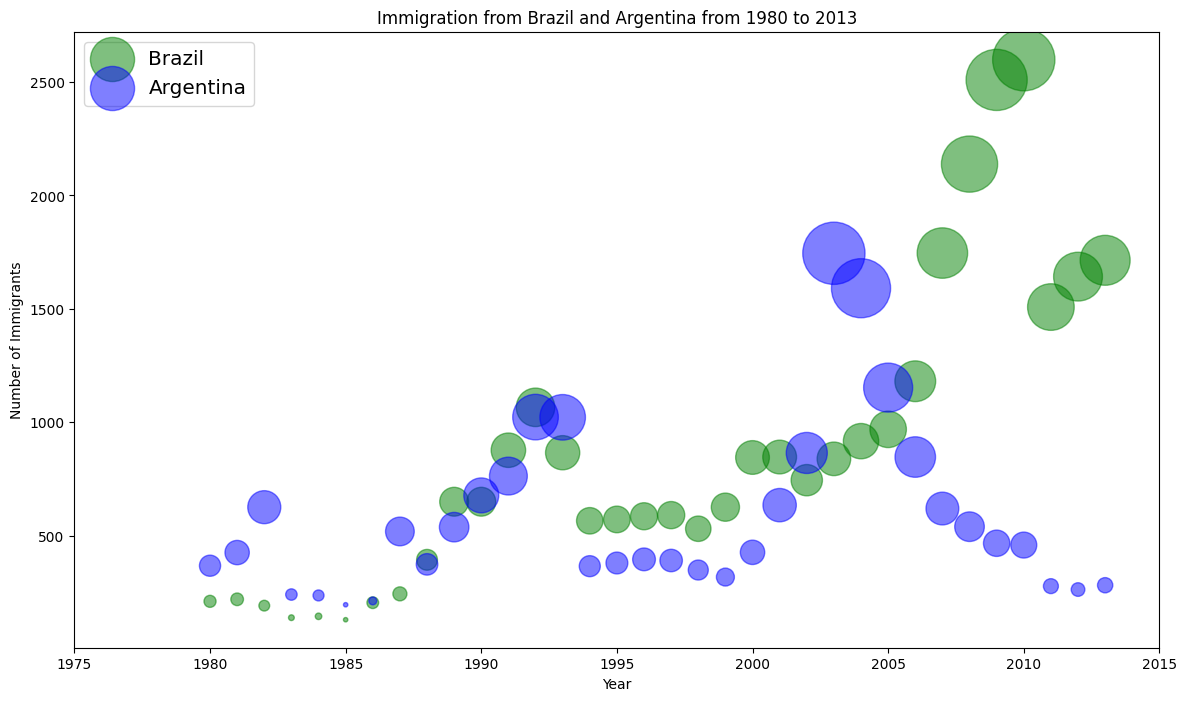

In [32]:
# STEP 3 PLot the data
# We will pass weights using s parameter. Given than normalized weights are between 0 -1, they wont be visible on plot, therefore we will:
# Multiply weights by 2000 to scale it up on graph
# add 10 to compensate for min value(which has 0 weight and therefore compensate with * 2000)
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of bubble corresponds to magnitude of immigration population for that year. The larger the bubble is, the more immigrants in that year.


In [37]:
# QUESTION: Create bubble plots of immigration from China and India to Canada to visualize differences from 1980 to 2013.
norm_china = (df_can_t['China']- df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India']- df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

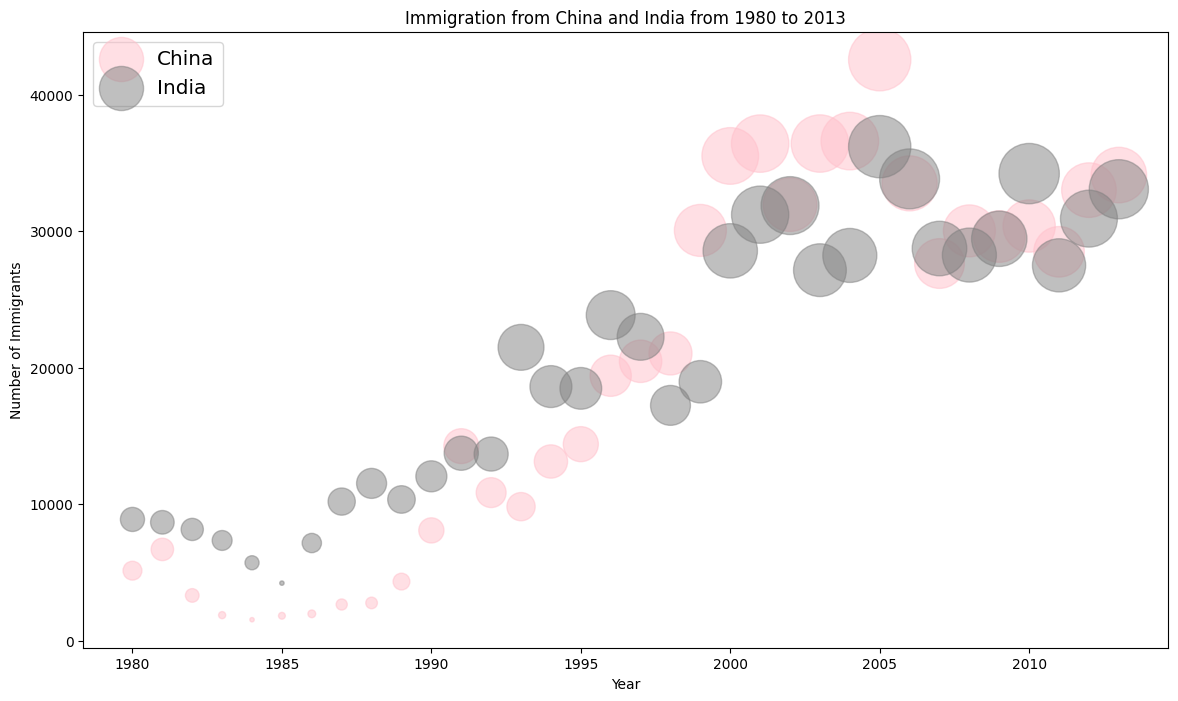

In [39]:
# Plotting the data

# China
ax0 = df_can_t.plot(kind='scatter',
             x= 'Year',
             y = 'China',
             alpha = 0.5,
             color= 'pink',
             s= norm_china *2000 +10,
             figsize=(14,8))
# India
ax1 = df_can_t.plot(kind = 'scatter',
              x='Year',
              y='India',
              alpha = 0.5,
              color='grey',
              s= norm_india * 2000 +10,
              ax=ax0)
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 to 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')